In [1]:
import matplotlib.pyplot as plt
import scipy as sc
import neurokit2 as nk
from scipy.signal import decimate 

import numpy as np
import pandas as pd

import os

In [2]:
#1.data path

In [35]:
home_path = "C:\\sebin\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

file_path = git_path+"\\check_real_data\\ecg.txt"
output_path = home_path+"\\save\\lab_data"


In [4]:
#2.data open

In [5]:
data = []

In [6]:
with open(file_path,'r') as f:
    cnt = 0

    f.readline()
    date_time = f.readline()

    while(True):
        line = f.readline()
        if  line == '':
            break
        data.extend(line.rstrip().split("  "))
        cnt+=1


In [7]:
n = len(data)
for i in range(n):
    data[i] = float(data[i])

In [8]:
# +check data

In [9]:
resampling = 28
print(n)

699548


In [10]:
re_n = n//28
print(re_n)

24983


In [11]:
#3. resampling

In [12]:
re_data = []
for i in range(re_n):
    re_data.append(data[i*resampling])

In [13]:
# + index

In [14]:
index = 5

In [15]:
#4. plot(default,downsampling)

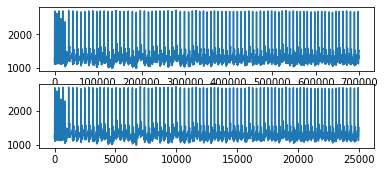

In [16]:
plt.subplot(3,1,1)
plt.plot(data)

plt.subplot(3,1,2)
plt.plot(re_data)

In [17]:
#5.  get peak and peak y_value

In [18]:
peak = nk.ecg.ecg_findpeaks(re_data, sampling_rate=360, method='neurokit')
peak = np.array(peak['ECG_R_Peaks'])

In [19]:
peak_y = np.zeros(re_n)
for i in peak:
    peak_y[i] = re_data[i]

In [20]:
#6. peak plot

In [21]:
re_n = range(re_n)

(1000.0, 2849.765625)

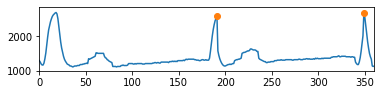

In [22]:

plt.subplot(3,1,3)
plt.plot(re_n,re_data,re_n,peak_y,"o")
plt.xlim((0,360))
plt.ylim(1000)


In [23]:
#7. segment make


In [24]:
#빠른방법인데 오류 
'''
seg =  np.zeros([peak.size,288])
flag = -1
for i in range(peak.size):
    if (peak[i]-144 >= 0) or (peak[i]+144 < peak[-1]) :
        r = peak[i]
        seg[flag][144] = re_data[r]
        flag += 1
        for j in range(144):
            seg[flag][144-j] = re_data[i-j]
            seg[flag][144+j] = re_data[i+j]
'''
            
            

'\nseg =  np.zeros([peak.size,288])\nflag = -1\nfor i in range(peak.size):\n    if (peak[i]-144 >= 0) or (peak[i]+144 < peak[-1]) :\n        r = peak[i]\n        seg[flag][144] = re_data[r]\n        flag += 1\n        for j in range(144):\n            seg[flag][144-j] = re_data[i-j]\n            seg[flag][144+j] = re_data[i+j]\n'

In [25]:
seg = []
size = peak.size
for i in range(size):
    r = peak[i]

    sepfrom = r-144
    septo = r+144

    if sepfrom <= 0:
        continue
    if septo >= peak[-1]:
        break

    seg.append(re_data[sepfrom:septo])

In [26]:
# ※p파가 초반에만 보이고 안보임

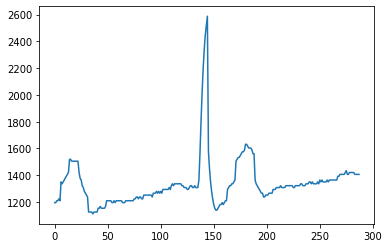

In [27]:
plt.plot(seg[0])

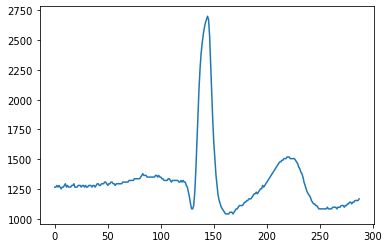

In [28]:
plt.plot(seg[30])

In [29]:
df = pd.DataFrame(seg)

In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,1195.312500,1195.312500,1209.375000,1209.375000,1223.437378,1209.375000,1350.000000,1335.937500,1350.000000,1364.062378,...,1420.312500,1420.312500,1420.312500,1420.312500,1420.312500,1406.250000,1406.250000,1406.250000,1406.250000,1406.250000
1,1195.312500,1181.250000,1195.312500,1209.375000,1209.375000,1293.749878,1307.812622,1321.875000,1321.875000,1335.937500,...,1420.312500,1420.312500,1434.374878,1448.437622,1448.437622,1420.312500,1420.312500,1420.312500,1406.250000,1420.312500
2,1251.562500,1279.687500,1279.687500,1279.687500,1293.749878,1476.562500,1476.562500,1490.625000,1504.687500,1504.687500,...,1378.125122,1392.187500,1378.125122,1378.125122,1378.125122,1378.125122,1434.374878,1420.312500,1406.250000,1406.250000
3,1378.125122,1378.125122,1392.187500,1406.250000,1420.312500,1420.312500,1420.312500,1434.374878,1532.812500,1532.812500,...,1335.937500,1335.937500,1321.875000,1321.875000,1335.937500,1335.937500,1350.000000,1350.000000,1364.062378,1335.937500
4,1434.374878,1448.437622,1448.437622,1462.500000,1476.562500,1532.812500,1518.750122,1518.750122,1518.750122,1518.750122,...,1195.312500,1195.312500,1181.250000,1195.312500,1195.312500,1209.375000,1209.375000,1209.375000,1209.375000,1195.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1321.875000,1321.875000,1335.937500,1335.937500,1335.937500,1335.937500,1350.000000,1364.062378,1350.000000,1350.000000,...,1237.500122,1237.500122,1251.562500,1265.625000,1251.562500,1265.625000,1265.625000,1265.625000,1265.625000,1279.687500
77,1279.687500,1293.749878,1293.749878,1307.812622,1279.687500,1279.687500,1293.749878,1293.749878,1307.812622,1307.812622,...,1195.312500,1195.312500,1195.312500,1195.312500,1195.312500,1195.312500,1209.375000,1223.437378,1223.437378,1209.375000
78,1265.625000,1265.625000,1279.687500,1279.687500,1279.687500,1265.625000,1265.625000,1279.687500,1279.687500,1279.687500,...,1223.437378,1223.437378,1223.437378,1237.500122,1223.437378,1237.500122,1237.500122,1237.500122,1237.500122,1237.500122
79,1279.687500,1279.687500,1279.687500,1293.749878,1293.749878,1279.687500,1279.687500,1279.687500,1279.687500,1293.749878,...,1195.312500,1209.375000,1209.375000,1209.375000,1209.375000,1209.375000,1223.437378,1223.437378,1237.500122,1237.500122


In [49]:
#8. save segment
def output_segment(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    for i in range(len(df.index)):
        data = pd.DataFrame(df.iloc[i])
        p = dir+"\\"+str(i)+".csv"
        data.to_csv(p,header=False,index=False)



In [50]:
output_segment(output_path+"\\no_p")

               0
0    1195.312500
1    1195.312500
2    1209.375000
3    1209.375000
4    1223.437378
..           ...
283  1406.250000
284  1406.250000
285  1406.250000
286  1406.250000
287  1406.250000

[288 rows x 1 columns]
             1
0    1195.3125
1    1181.2500
2    1195.3125
3    1209.3750
4    1209.3750
..         ...
283  1420.3125
284  1420.3125
285  1420.3125
286  1406.2500
287  1420.3125

[288 rows x 1 columns]
               2
0    1251.562500
1    1279.687500
2    1279.687500
3    1279.687500
4    1293.749878
..           ...
283  1378.125122
284  1434.374878
285  1420.312500
286  1406.250000
287  1406.250000

[288 rows x 1 columns]
               3
0    1378.125122
1    1378.125122
2    1392.187500
3    1406.250000
4    1420.312500
..           ...
283  1335.937500
284  1350.000000
285  1350.000000
286  1364.062378
287  1335.937500

[288 rows x 1 columns]
               4
0    1434.374878
1    1448.437622
2    1448.437622
3    1462.500000
4    1476.562500
..        